# Import Pacakges/Load Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = 100 

In [2]:
df = pd.read_csv('2021_donnees_ouvertes.csv')
df1 = pd.read_csv('2021_stations.csv')

In [3]:
df.head()

,start_date,emplacement_pk_start,end_date,emplacement_pk_end,duration_sec,is_member
0,2021-06-29 17:46:28.653,10,2021-06-29 19:33:25.700,10,6417,0
1,2021-04-25 18:02:39.110,10,2021-04-25 18:13:26.139,188,647,0
2,2021-08-08 18:50:31.633,10,2021-08-08 18:58:57.585,778,505,1
3,2021-10-11 17:50:15.346,10,2021-10-11 18:25:31.726,504,2116,1
4,2021-09-10 15:51:58.050,10,2021-09-10 16:21:01.403,780,1743,1


In [4]:
df1.head()

,pk,name,latitude,longitude
0,10,Métro Angrignon (Lamont / des Trinitaires),45.446910,-73.603630
1,13,Métro de l'Église (Ross / de l'Église),45.462726,-73.565959
2,17,Tolhurst / Fleury,45.544149,-73.667520
3,21,St-Christophe / Cherrier,45.520290,-73.568119
4,31,Lespérance / de Rouen,45.538839,-73.552779


The first dataset has the information about all the trips in 2021, and we have the station name and geographical information corresponding to each station number 'pk'. For our analysis, we need to combine two datasets into a cohesion.

First, examine some basic information about the datasets.

In [5]:
# check the shape of data frame
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the data frame.')
print(f'There are {df1.shape[0]} rows and {df1.shape[1]} columns in the data frame.')

There are 5566351 rows and 6 columns in the data frame.
There are 829 rows and 4 columns in the data frame.


# Merge Datasets

Notice that there are two columns in df with values of station numbers, 'emplacement_pk_start' and 'emplacement_pk_end'. I will augment the station information independently for the starting trips and ending trips.

In [6]:
# add starting station information
df = pd.merge(df,df1,left_on='emplacement_pk_start',right_on='pk', how='left')

# add ending station information
df = pd.merge(df,df1,left_on='emplacement_pk_end',right_on='pk', how='left')

In [7]:
# look at merged dataframe
df.head()

,start_date,emplacement_pk_start,end_date,emplacement_pk_end,duration_sec,is_member,pk_x,name_x,latitude_x,longitude_x,pk_y,name_y,latitude_y,longitude_y
0,2021-06-29 17:46:28.653,10,2021-06-29 19:33:25.700,10,6417,0,10,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,10,Métro Angrignon (Lamont / des Trinitaires),45.446910,-73.603630
1,2021-04-25 18:02:39.110,10,2021-04-25 18:13:26.139,188,647,0,10,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,188,Bibliothèque de Verdun (Brown / Bannantyne),45.448262,-73.577856
2,2021-08-08 18:50:31.633,10,2021-08-08 18:58:57.585,778,505,1,10,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,778,Métro Jolicoeur (de Sève / Drake),45.456086,-73.581937
3,2021-10-11 17:50:15.346,10,2021-10-11 18:25:31.726,504,2116,1,10,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,504,Gagne / LaSalle,45.422451,-73.601194
4,2021-09-10 15:51:58.050,10,2021-09-10 16:21:01.403,780,1743,1,10,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,780,LaSalle / 80e avenue,45.415769,-73.637924


Since the 'emplacement_pk_start' and 'emplacement_pk_end' contains the redundant information with 'pk_x' and 'pk_y'. We can just keep one set of them, let's drop the redundant columns.

In [8]:
# drop 'pk_x' and 'pk_y'
df = df.drop(columns=['pk_x','pk_y'])

In [9]:
# modify the columns names based on start/end trips

# define a dictionary to map selected column names to new column names
col_name_mapping = {'name_x':'start_station_name',
                    'latitude_x':'start_station_latitude',
                    'longitude_x':'start_station_longitude',
                    'name_y':'end_station_name',
                    'latitude_y':'end_station_latitude',
                    'longitude_y':'end_station_longitude'}

# map the new names to the original columns
df.rename(columns=col_name_mapping,inplace='True')

In [10]:
df.head()

,start_date,emplacement_pk_start,end_date,emplacement_pk_end,duration_sec,is_member,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude
0,2021-06-29 17:46:28.653,10,2021-06-29 19:33:25.700,10,6417,0,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Métro Angrignon (Lamont / des Trinitaires),45.446910,-73.603630
1,2021-04-25 18:02:39.110,10,2021-04-25 18:13:26.139,188,647,0,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Bibliothèque de Verdun (Brown / Bannantyne),45.448262,-73.577856
2,2021-08-08 18:50:31.633,10,2021-08-08 18:58:57.585,778,505,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Métro Jolicoeur (de Sève / Drake),45.456086,-73.581937
3,2021-10-11 17:50:15.346,10,2021-10-11 18:25:31.726,504,2116,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Gagne / LaSalle,45.422451,-73.601194
4,2021-09-10 15:51:58.050,10,2021-09-10 16:21:01.403,780,1743,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,LaSalle / 80e avenue,45.415769,-73.637924


# Drop Duplicates

In [11]:
# check if there is any duplicated value in the dataset
print(f'There are {df.duplicated().sum()} duplicated values in the dataset, accounts for {round(df.duplicated().sum()/len(df),4)}% of the entire data.')

There are 3 duplicated values in the dataset, accounts for 0.0% of the entire data.


There are only 3 duplicates, it is safe to drop them from the data frame.

In [12]:
# drop duplicates
df = df.drop_duplicates()

# check
print(f'There are {df.duplicated().sum()} duplicates left.')

There are 0 duplicates left.


# Handle Missing Values

In [13]:
# check for the number of rows contains null values
df.isna().sum()

start_date                 0
emplacement_pk_start       0
end_date                   0
emplacement_pk_end         0
duration_sec               0
is_member                  0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
dtype: int64

Perfect! There are no null data in the dataframe.

# Convert Data Type

In [14]:
# check data type
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5566348 entries, 0 to 5566350
Data columns (total 12 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   start_date               object 
 1   emplacement_pk_start     int64  
 2   end_date                 object 
 3   emplacement_pk_end       int64  
 4   duration_sec             int64  
 5   is_member                int64  
 6   start_station_name       object 
 7   start_station_latitude   float64
 8   start_station_longitude  float64
 9   end_station_name         object 
 10  end_station_latitude     float64
 11  end_station_longitude    float64
dtypes: float64(4), int64(4), object(4)
memory usage: 552.1+ MB
None


'start_date' and 'end_date' should be in datetime format, in order for us to extract time-related information.

In [15]:
# convert 'start_date' and 'end_date' to datetime data type
df['start_date'] = pd.to_datetime(df['start_date'])
df['end_date'] = pd.to_datetime(df['end_date'])

In [16]:
# check
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5566348 entries, 0 to 5566350
Data columns (total 12 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_date               datetime64[ns]
 1   emplacement_pk_start     int64         
 2   end_date                 datetime64[ns]
 3   emplacement_pk_end       int64         
 4   duration_sec             int64         
 5   is_member                int64         
 6   start_station_name       object        
 7   start_station_latitude   float64       
 8   start_station_longitude  float64       
 9   end_station_name         object        
 10  end_station_latitude     float64       
 11  end_station_longitude    float64       
dtypes: datetime64[ns](2), float64(4), int64(4), object(2)
memory usage: 552.1+ MB
None


# Correct Trip Duration

The dataset includes a column representing trip durations, and it is necessary to verify the accuracy of these numerical values.

In [17]:
# calculate the trip durations
df['duration'] = (df['end_date']-df['start_date']).dt.total_seconds()

In [18]:
# check how many  'duration' and 'duration_sec' match
print(f"There are {(df['duration']!=df['duration_sec']).sum()} data that do not match on durations.")

There are 5560786 data that do not match on durations.


In [19]:
df[df['duration']!=df['duration_sec']].head()

,start_date,emplacement_pk_start,end_date,emplacement_pk_end,duration_sec,is_member,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,duration
0,2021-06-29 17:46:28.653,10,2021-06-29 19:33:25.700,10,6417,0,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Métro Angrignon (Lamont / des Trinitaires),45.446910,-73.603630,6417.047
1,2021-04-25 18:02:39.110,10,2021-04-25 18:13:26.139,188,647,0,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Bibliothèque de Verdun (Brown / Bannantyne),45.448262,-73.577856,647.029
2,2021-08-08 18:50:31.633,10,2021-08-08 18:58:57.585,778,505,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Métro Jolicoeur (de Sève / Drake),45.456086,-73.581937,505.952
3,2021-10-11 17:50:15.346,10,2021-10-11 18:25:31.726,504,2116,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Gagne / LaSalle,45.422451,-73.601194,2116.380
4,2021-09-10 15:51:58.050,10,2021-09-10 16:21:01.403,780,1743,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,LaSalle / 80e avenue,45.415769,-73.637924,1743.353


It appears that a majority of the data exhibits discrepancies in the duration column. After examination it seems that the 'duration_sec' column provided to us might have overlooked milliseconds. Let's eliminate the milliseconds and verify if the values align.

In [20]:
# convert seconds to integer
df['duration'] = df['duration'].astype(int)

In [21]:
# check again
print(f"There are {(df['duration']!=df['duration_sec']).sum()} data that do not match on durations.")

There are 73 data that do not match on durations.


After eliminating milliseconds, there are still 73 inconsistencies, lets examine them.

In [22]:
# get inconsistent rows
inconsistent_duration = df[df['duration']!=df['duration_sec']]
inconsistent_duration.head()

,start_date,emplacement_pk_start,end_date,emplacement_pk_end,duration_sec,is_member,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,duration
26175,2021-11-07 01:48:27.871,36,2021-11-07 01:00:53.416,546,745,1,St-Cuthbert / St-Urbain,45.514773,-73.578312,Bloomfield / Van Horne,45.522586,-73.612658,-2854
396076,2021-11-07 01:55:49.564,167,2021-11-07 01:01:46.590,236,357,1,Boyer / du Mont-Royal,45.527432,-73.579917,Parc Jeanne-Mance (du Mont-Royal / du Parc),45.517000,-73.589000,-3242
450638,2021-11-07 01:55:29.473,169,2021-11-07 01:05:43.741,1033,614,1,de Brébeuf / du Mont-Royal,45.529408,-73.578154,Parc Baldwin (Fullum / Sherbrooke),45.534070,-73.562651,-2985
450643,2021-11-07 01:55:45.668,169,2021-11-07 01:05:40.899,1033,595,1,de Brébeuf / du Mont-Royal,45.529408,-73.578154,Parc Baldwin (Fullum / Sherbrooke),45.534070,-73.562651,-3004
530169,2021-11-07 01:55:06.384,175,2021-11-07 01:04:36.242,316,569,1,Chabot / du Mont-Royal,45.534185,-73.573589,Prince-Arthur / du Parc,45.510590,-73.575470,-3030


It seems that the 'start_date' and 'end_date' are reversed, leading to negative values in the calculated duration. Additionally, the values do not align numerically. We need to address and rectify these issues first, before replacing duration with correct values.

In [23]:
print(f"There are {sum(df['end_date'] < df['start_date'])} rows are reversed in start and end times.")

There are 66 rows are reversed in start and end times.


In [24]:
# swap start and end times

# define function
def swap_tripdate(x):
    if x['end_date']<x['start_date']:
        return pd.Series([x['start_date'], x['end_date']], index=['start_date', 'end_date'])
    
    else:
        return pd.Series([x['end_date'],x['start_date']],index=['start_date','end_date'])
    
# apply function to dateframe
df[['end_date','start_date']] = df.apply(swap_tripdate,axis=1)

In [25]:
print(f"There are {sum(df['end_date'] < df['start_date'])} rows are reversed in start and end times.")

There are 0 rows are reversed in start and end times.


Now, we need to calculate the duration again with corrected start and end times.

In [26]:
# calculate the trip durations
df['duration'] = (df['end_date']-df['start_date']).dt.total_seconds()

# convert seconds to integer
df['duration'] = df['duration'].astype(int)

In [27]:
df.head()

,start_date,emplacement_pk_start,end_date,emplacement_pk_end,duration_sec,is_member,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,duration
0,2021-06-29 17:46:28.653,10,2021-06-29 19:33:25.700,10,6417,0,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Métro Angrignon (Lamont / des Trinitaires),45.446910,-73.603630,6417
1,2021-04-25 18:02:39.110,10,2021-04-25 18:13:26.139,188,647,0,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Bibliothèque de Verdun (Brown / Bannantyne),45.448262,-73.577856,647
2,2021-08-08 18:50:31.633,10,2021-08-08 18:58:57.585,778,505,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Métro Jolicoeur (de Sève / Drake),45.456086,-73.581937,505
3,2021-10-11 17:50:15.346,10,2021-10-11 18:25:31.726,504,2116,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,Gagne / LaSalle,45.422451,-73.601194,2116
4,2021-09-10 15:51:58.050,10,2021-09-10 16:21:01.403,780,1743,1,Métro Angrignon (Lamont / des Trinitaires),45.44691,-73.60363,LaSalle / 80e avenue,45.415769,-73.637924,1743


Finally, I can replace trip durations with correct calculations.

In [28]:
# use lambda function to change the 'duration_sec' to 'duration' they are not the same
df['duration_sec'] = df.apply(lambda x: x['duration_sec'] if x['duration_sec']==x['duration'] else x['duration'],axis=1)

In [29]:
# check
print(f"There are {(df['duration']!=df['duration_sec']).sum()} data that do not match on durations.")

There are 0 data that do not match on durations.


In [30]:
df[df['duration_sec']<0].head()

,start_date,emplacement_pk_start,end_date,emplacement_pk_end,duration_sec,is_member,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,duration


We now have all the correctly calculate trip durations.

In [31]:
# check statistical attributes of 'duration_sec' column
df['duration_sec'].describe()

count    5.566348e+06
mean     8.618157e+02
std      1.810807e+03
min      0.000000e+00
25%      3.660000e+02
50%      6.420000e+02
75%      1.091000e+03
max      1.565260e+06
Name: duration_sec, dtype: float64

Take note that the trip durations are measured in seconds and exhibit a considerable range from 0 to 1565260 seconds. This suggests the presence of potential outliers in the dataset, I will check this in the next step. To facilitate interpretations and calculations, I will convert this column to minutes.

In [32]:
# convert 'duration_sec' to minutes
df['duration'] = df['duration_sec']/60

In [33]:
# drop 'duration_sec' columns
df = df.drop(columns='duration_sec')

In [34]:
# check again
df['duration'].describe()

count    5.566348e+06
mean     1.436360e+01
std      3.018012e+01
min      0.000000e+00
25%      6.100000e+00
50%      1.070000e+01
75%      1.818333e+01
max      2.608767e+04
Name: duration, dtype: float64

# Handle Invalid Trips

To understand the distribution of 'duration' column, boxplot could be helpful.

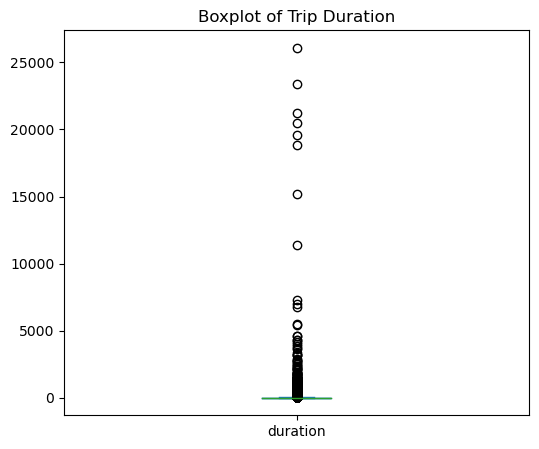

In [35]:
# make a boxplot for 'duration'

plt.figure(figsize=(6,5))

df['duration'].plot(kind='box')
plt.title('Boxplot of Trip Duration')

plt.show()

From the boxplot, we can see there is a large number of data clustered around 0, let's check if there is any trips with duration 0.

In [36]:
print(f"There are total {len(df[df['duration']==0])} trips with duration equals to 0.")

There are total 20 trips with duration equals to 0.


In [37]:
# look at these data
df[df['duration']==0].head()

,start_date,emplacement_pk_start,end_date,emplacement_pk_end,is_member,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,duration
40553,2021-05-18 18:34:49.540,38,2021-05-18 18:34:50.105,38,1,Métro Vendôme (de Marlowe / de Maisonneuve),45.473868,-73.604538,Métro Vendôme (de Marlowe / de Maisonneuve),45.473868,-73.604538,0.0
667587,2021-07-06 15:40:08.611,198,2021-07-06 15:40:09.059,198,1,2e avenue / Wellington,45.457893,-73.567528,2e avenue / Wellington,45.457893,-73.567528,0.0
946407,2021-09-20 00:30:13.522,235,2021-09-20 00:30:13.991,235,1,Square St-Louis (du Square St-Louis / Laval),45.516091,-73.570129,Square St-Louis (du Square St-Louis / Laval),45.516091,-73.570129,0.0
1526946,2021-08-03 20:26:38.187,274,2021-08-03 20:26:39.057,274,0,Gare d'autocars de Montréal (Berri / Ontario),45.516897,-73.563949,Gare d'autocars de Montréal (Berri / Ontario),45.516897,-73.563949,0.0
1809671,2021-07-15 08:36:35.838,311,2021-07-15 08:36:36.229,311,1,Milton / Durocher,45.508141,-73.574930,Milton / Durocher,45.508141,-73.574930,0.0


It is evident that trips with a 'duration' value of 0 exhibit slight variations in their start and end times, although the difference is minimal. One plausible assumption is that trips concluding only a few seconds or under 1 minute later may be attributed to users returning malfunctioning bikes or altering their decision to use the bikes—essentially, a change in travel plans. Consequently, these data points are not conducive to our analysis of user behavior and should be excluded from the dataset.<br>
For this next step, I will try a set of various shortest trip druations and check if they are indeed invalid. To filter out the trips that lasted unsually short with the same start and end stations, as they could be invalid trips for this analysis. 

In [38]:
# set vairous threshold for the shortest 
print(f"Minimal duration 15 seconds: There are {round(len(df[(df['duration']<0.25) & (df['start_station_name']==df['end_station_name'])])/len(df[df['duration']<0.25]),2)*100}% trips where users returned the bike to the same location.")
print(f"Minimal duration 30 seconds: There are {round(len(df[(df['duration']<0.5) & (df['start_station_name']==df['end_station_name'])])/len(df[df['duration']<0.5]),2)*100}% trips where users returned the bike to the same location.")
print(f"Minimal duration 1 minute: There are {round(len(df[(df['duration']<1) & (df['start_station_name']==df['end_station_name'])])/len(df[df['duration']<1]),2)*100}% trips where users returned the bike to the same location.")
print(f"Minimal duration 1 minute 15 seconds: There are {round(len(df[(df['duration']<1.25) & (df['start_station_name']==df['end_station_name'])])/len(df[df['duration']<1.25]),2)*100}% trips where users returned the bike to the same location.")

Minimal duration 15 seconds: There are 100.0% trips where users returned the bike to the same location.
Minimal duration 30 seconds: There are 100.0% trips where users returned the bike to the same location.
Minimal duration 1 minute: There are 96.0% trips where users returned the bike to the same location.
Minimal duration 1 minute 15 seconds: There are 87.0% trips where users returned the bike to the same location.


Trips with duration exceeding 1 minute start are more likely to be valid trips, I will choose 1 minute as the threshold for filtering.

In [39]:
# get the data with duration shorter than 1 minute and same pickup/return stations
short_trips = df[(df['duration']<1) & (df['start_station_name']==df['end_station_name'])]

In alignment with our initial assumption, trips with durations of less than 5 minutes exhibit identical start and end stations. This implies that users did not actually ride the bikes but rather returned them to the same stations.

In addition, a trip shouldn't be too long either, in the above boxplot, we see there are few trips that are way too long. The data points with duration longer than 4 hours are very sparse, this serves as a simplified criterion for categorizing and examining trips, allowing for a more focused and manageable analysis.<br>(It is essential to note that this criterion might be subject to adjustment based on further insights or specific requirements of the analysis.)

In [40]:
# get trips lasted longer than 4 hours
df[df['duration']>=240]

,start_date,emplacement_pk_start,end_date,emplacement_pk_end,is_member,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,duration
2296,2021-04-18 19:50:18.691,10,2021-04-19 03:56:10.728,10,1,Métro Angrignon (Lamont / des Trinitaires),45.446910,-73.603630,Métro Angrignon (Lamont / des Trinitaires),45.446910,-73.603630,485.866667
3174,2021-11-01 09:09:48.064,10,2021-11-01 13:40:51.150,966,1,Métro Angrignon (Lamont / des Trinitaires),45.446910,-73.603630,Gloria / Dollard,45.429711,-73.633883,271.050000
8470,2021-04-13 00:06:20.278,13,2021-04-27 17:29:49.326,790,1,Métro de l'Église (Ross / de l'Église),45.462726,-73.565959,Métro de Castelnau (de Castelnau / St-Laurent),45.535709,-73.619624,21203.483333
11389,2021-11-07 13:38:43.484,13,2021-11-07 17:44:20.362,395,0,Métro de l'Église (Ross / de l'Église),45.462726,-73.565959,Square Victoria (Viger / du Square-Victoria),45.502060,-73.562950,245.600000
12243,2021-04-17 15:50:13.057,13,2021-04-17 21:28:55.391,185,1,Métro de l'Église (Ross / de l'Église),45.462726,-73.565959,Parc des Rapides (LaSalle / 6e avenue),45.429471,-73.593099,338.700000
...,...,...,...,...,...,...,...,...,...,...,...,...
5563484,2021-11-06 13:02:10.635,1131,2021-11-06 17:02:52.313,384,0,Robert-Bourassa / de Maisonneuve,45.503858,-73.571094,Cypress / Peel,45.499325,-73.571768,240.683333
5563495,2021-11-06 13:01:51.420,1131,2021-11-06 17:02:56.289,384,0,Robert-Bourassa / de Maisonneuve,45.503858,-73.571094,Cypress / Peel,45.499325,-73.571768,241.066667
5563507,2021-10-30 02:29:06.242,1131,2021-10-30 08:51:48.739,47,0,Robert-Bourassa / de Maisonneuve,45.503858,-73.571094,Métro Guy-Concordia (Guy / St-Catherine),45.495045,-73.577830,382.700000
5565728,2021-11-04 08:44:56.993,1135,2021-11-04 13:52:59.592,696,1,du Mont-Royal / Laurendeau,45.544471,-73.567251,Hutchison / Beaubien,45.526058,-73.612969,308.033333


Based on our assumption, there are 1301 trips that are deemed unrealistic, we should drop them from the dataset as well.

In [42]:
# drop unusable trip entries
df = df[((df['duration'] >= 1) & (df['start_station_name'] != df['end_station_name'])) & (df['duration'] <= 240)]

# Export Cleaned Dataframe

In [43]:
# check shape of final dataset
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the data frame.')

There are 5308801 rows and 12 columns in the data frame.


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5308801 entries, 1 to 5566350
Data columns (total 12 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   start_date               datetime64[ns]
 1   emplacement_pk_start     int64         
 2   end_date                 datetime64[ns]
 3   emplacement_pk_end       int64         
 4   is_member                int64         
 5   start_station_name       object        
 6   start_station_latitude   float64       
 7   start_station_longitude  float64       
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  duration                 float64       
dtypes: datetime64[ns](2), float64(5), int64(3), object(2)
memory usage: 526.5+ MB


In [45]:
# export final csv file
df.to_csv('df_cleaned.csv',index=False)